<a href="https://colab.research.google.com/github/chrispanop/Chris_data/blob/main/Malicious_Detection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malicious Detection
Σε αυτό το notebook θα εξετάσουμε δεδομένα δικτύου από το αρχείο `DarkNet.csv` και θα δημιουργήσουμε ένα μοντέλο μηχανικής μάθησης για την ανίχνευση κακόβουλων ροών.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
url = 'https://raw.githubusercontent.com/kdemertzis/EKPA/refs/heads/main/Data/DarkNet.csv'
data = pd.read_csv(url)

# Display basic information about the dataset
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68580 entries, 0 to 68579
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Src_IP                      68580 non-null  object 
 1   Src_Port                    68580 non-null  int64  
 2   Dst_IP                      68580 non-null  object 
 3   Dst_Port                    68580 non-null  int64  
 4   Protocol                    68580 non-null  int64  
 5   Flow_Duration               68580 non-null  int64  
 6   Total_Fwd_Packet            68580 non-null  int64  
 7   Total_Bwd_packets           68580 non-null  int64  
 8   Total_Length_of_Fwd_Packet  68580 non-null  int64  
 9   Total_Length_of_Bwd_Packet  68580 non-null  int64  
 10  Fwd_Packet_Length_Max       68580 non-null  int64  
 11  Fwd_Packet_Length_Min       68580 non-null  int64  
 12  Fwd_Packet_Length_Mean      68580 non-null  float64
 13  Fwd_Packet_Length_Std       685

<ipython-input-16-1ac4e7c9abdb>:13: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


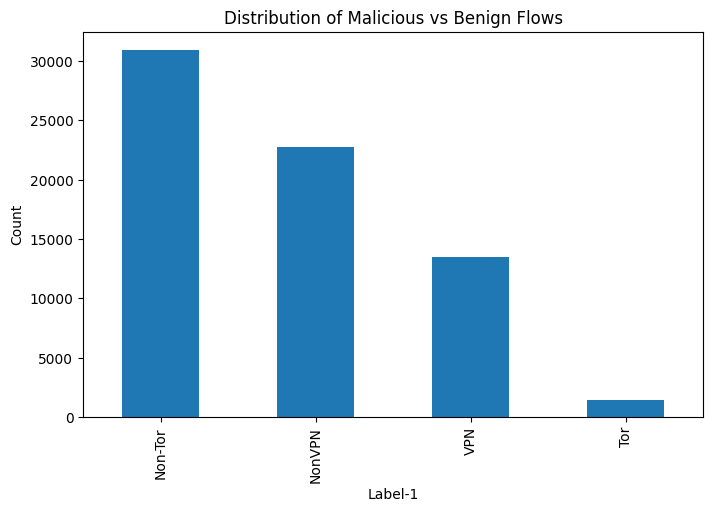

In [ ]:
# Analyze the target column 'Label'
label_distribution = data['Label-1'].value_counts()
plt.figure(figsize=(8, 5))
label_distribution.plot(kind='bar', title='Distribution of Malicious vs Benign Flows')
plt.xlabel('Label-1')
plt.ylabel('Count')
plt.show()

In [ ]:
# Select numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
#numerical_features.remove('Label-1')  # Remove the target column

# Prepare data for training
target = data['Label-1']
X = data[numerical_features]
y = target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train Random Forest Classifier
# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values (if any) with the mean of the column
# You can explore other imputation techniques as well
for col in X.columns:
    X[col].fillna(X[col].mean(), inplace=True)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # Fit and transform on the entire dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

<ipython-input-19-f09ae897c7fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-19-f09ae897c7fc>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
<ipython-input-19-f09ae897c7fc>:8: SettingWithCopyWarning: 
A value is trying to be set o

In [ ]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      9266
      NonVPN       0.95      0.96      0.96      6806
         Tor       0.96      0.89      0.92       425
         VPN       0.94      0.93      0.93      4077

    accuracy                           0.97     20574
   macro avg       0.96      0.94      0.95     20574
weighted avg       0.97      0.97      0.97     20574

Confusion Matrix:
 [[9253    4    0    9]
 [  11 6535   13  247]
 [   1   44  380    0]
 [  12  283    4 3778]]


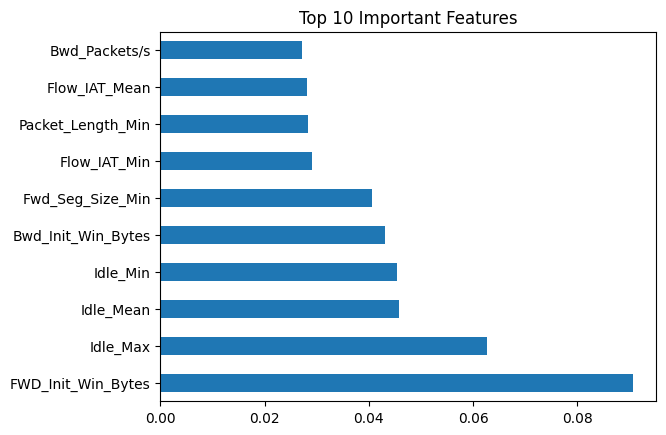

In [ ]:
# Visualize feature importance
feature_importances = pd.Series(clf.feature_importances_, index=numerical_features)
feature_importances.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()